<h1 style="color:blue"> OpenCV </h1>

<h2 style="color:red">Package for image processing and computer vision tasks</h2>

<h4>Sebine Jacobson (svjacobs)</h4>
<h4>Class: CSC295-02</h4>
<h4>Date: 12/05/2023</h4>


<h3 style="color:red">Background Information: An Introduction to OpenCV</h3>

<h5 style="color:green">General Purpose</h5>OpenCV is a cross-platform library built for intensive computer vision tasks with a strong focus on real-time application. OpenCV's image processing capabilities include image stitching, camera calibration, and image pre-processing tasks while the computer vision capabilities include face recongition, object idetification, motion detection, and augmented reality overlay.
<h5 style="color:green">Creation Date and Version</h5>
OpenCV was started at Intel in 1999 and released in 2000 for a vairety of interfaces including C++, Python, Java, and MATLAB. 
<br>
The lastest version of OpenCV is 4.8.78 as of September 28, 2023. 
<h5 style="color:green">Similar Packages</h5>

* Scikit_Image
* Pillow 

Scikit_Image and Pillow have similar image processing capabilities as OpenCV, but OpenCV is often more efficient because it was written in C++. Another difference is that OpenCV uses the BGR color pallete instead of the typical RGB pallete.

* SimpleCV
* Kornia

Some other computer vision packages include SimpleCV, which builds on OpenCV and other packages but is better for simple scripting, and Kornia, which is again much slower and is made to build off of PyTorch functionality. 

<h5 style="color:green">Other Packages that can be used with OpenCV</h5>

* NumPy
* Matplotlib
* face_recingition
* DeepFace
* PyTorch

There are no other packages that *must* be used with OpenCV, but since OpenCV utilizes NumPy arrays, OpenCV is often used with NumPy and Matplotlib for manipulating and showing images. OpenCV can also be used with the face_recognition libary which is built-in to Python, DeepFace, which is a lightweight facial recongition library, and the machine learning framework PyTorch for deep learning computer vision applications. 

<h5 style="color:green">Environment Requirements</h5>
OpenCV for Python requires a 32 or 64 bit computer, a Windows, macOS, or Linux operating system, and Python 3.6 or later. 



<h5 style="color:green">Advantages</h5>

* Open Source
* Written in C and C++ 
* Over 2500 algorithms
* Extensive documentation
* Includes both image processing and computer vision capabilities

OpenCV is best suited for real-time computer vision and image processing. It is also very fast computationally so users don't have to worry about speed and memory. 

<h5 style="color:green">Disadvantages and Limitations</h5>

* Complex for beginners
* May require working knowledge of machine learning for more advanced applications

One limitation I found with the simple functions I used is that face detection may not be super accurate depending on the algorithm used and it may detect objects that aren't faces or miss non-front facing faces. Additionally, for simple face recognition, biology is not factored in so holding up a picture of a person is enough to trick the algorithm. While not specific to OpenCV, lighting, poses, accessories, and expressions are challeneges for facial recognition in general. 

<h5 style="color:green">Documentation</h5>
Since OpenCV has been around for over 20 years, there is extensive documentation and tutorials about OpenCV. I did not find any bugs during the time I worked with it. 
Some good tutorials specifically for OpenCV-python can be found here: https://docs.opencv.org/3.4/d6/d00/tutorial_py_root.html 

In [1]:
#Import packages
import cv2
import pathlib
import numpy as np
import matplotlib.pyplot as plt

<h3 style="color:red">Image Processing</h3>
<h5>The following blocks show some of the simple image processing capabilities of OpenCV such as resizing, sharpening, and adding light.</h5>

<p style="color:green"> The reference image is read, conconverted from the BGR pallete to the RGB pallete, and resized. The first image shown is how the image looks in BGR while the second image is what it looks after being converted to RGB. OpenCV uses the BGR format because that was what was popular among camera manufacturers and image software producers at that time.</p>

Text(0.5, 1.0, 'RGB')

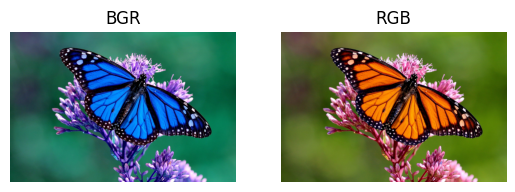

In [2]:
# Read, convert, resize, and plot images.

original_img = cv2.imread("butterfly.jpg")
reference_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
image_resize = cv2.resize(reference_img, None, fx=.5, fy=.5)
fig = plt.figure()
axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)
axes1.axis("off")
axes2.axis("off")
axes1.imshow(original_img)
axes2.imshow(reference_img)
axes1.set_title("BGR")
axes2.set_title("RGB")

In [3]:
# Create ndarrays for the sharpening and exposure factors
sharpen = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened_image = cv2.filter2D(image_resize, -1, sharpen)

exposure = np.array([[1,1,1], [1,1,1], [1,1,1]]) / 4
exposure_image = cv2.filter2D(image_resize, -1, exposure)


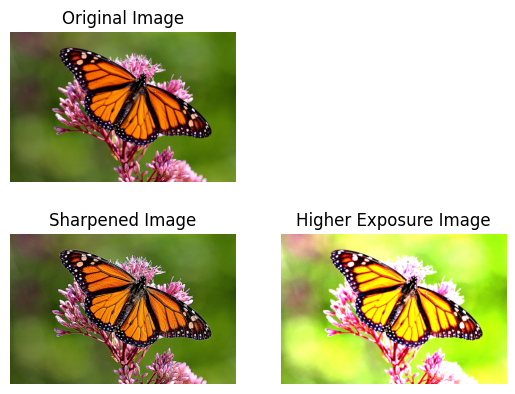

In [4]:
# Plot original image, sharpened image, and blurred image
fig = plt.figure()
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 3)
axes3 = fig.add_subplot(2, 2, 4) 
axes1.axis("off")
axes2.axis("off")
axes3.axis("off")
axes1.imshow(image_resize)
axes2.imshow(sharpened_image)
axes3.imshow(exposure_image)
axes1.set_title("Original Image")
axes2.set_title("Sharpened Image")
axes3.set_title("Higher Exposure Image")
plt.show()


<h3 style="color:red">Edge Detection</h3>
<h5>The following blocks shows simple video processing using algorithms that can be used for edge detection.</h5>

In [5]:
# This sets up the video capture for the following applications. 
# The 0 gets the first or main camera, but other numbers can be used if you have other cameras. 
camera = cv2.VideoCapture(0)

<p style="color:green">The Laplacian filter detects edges without removing the noise elsewhere. 
The filter is put on the frame which is then converted from a float to an int to visualize each pixel. 
Canny is another edge detection algorithm, but it removes noise and unwanted pixels that may not consitute an edge. 
The numbers passed as parameters to the Canny function are the thresholds for noise. The lower the numbers, the more noise there will be. </p>

In [6]:
# Must run to see video output
# Press Q to exit the loop and stop the video

while True:
    _, frame = camera.read()

    cv2.imshow("Camera", frame)

    laplacian = cv2.Laplacian(frame, cv2.CV_64F)
    laplacian = np.uint8(laplacian)
    cv2.imshow('Laplacian', laplacian)

    edges = cv2.Canny(frame, 100, 100)
    cv2.imshow('Canny', edges)

    if cv2.waitKey(1) == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

<img src="laplacian.png" height=300px width=350px>
<img src="canny.png" height=300px width=350px>

<h3 style="color:red">Face Detection</h3>
<h5>The following blocks show OpenCV's computer vision capabilties using simple face detection.</h5>

In [ ]:
# Gets the haarcascade algorithm files, which are included with OpenCV, and are used to detect objects in real-time. 
# Clf is the classifer object being used to find faces. 
camera2 = cv2.VideoCapture(0)
cascade_path = pathlib.Path(cv2.__file__).parent.absolute() / "data/haarcascade_frontalface_default.xml"
clf = cv2.CascadeClassifier(str(cascade_path))

<p style="color:green">Inside the following loop, the camera reads the frame and then passes it to the Haarcascade algorithm to detect the faces. The minNeighbors
parameter determines how strict the algorithm is, so if the number is higher, it will be stricter in identifying what faces are dectected. 
The length of the faces agorithm determines what text is shown on the screen and the rectangle function puts a square around each face detected. </p>

In [ ]:
# Must run to see video output
# Press Q to stop the video and exit the loop. 

while True:
    _, frame = camera2.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = clf.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE 
    )
    if len(faces) == 1:
        text = f"{len(faces)} Face Detected"
        cv2.putText(frame, text, (20, 450), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 3)
    elif len(faces) > 1:
        text = f"{len(faces)} Faces Detected"
        cv2.putText(frame, text, (20, 450), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 3)
    else:
        cv2.putText(frame, "No Face Detected", (20, 450), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 3)

    for (x,y, width, height) in faces:
        cv2.rectangle(frame, (x,y), (x+width, y+height), (255,255,0), 2)

    cv2.imshow("Faces", frame)

    if cv2.waitKey(1) == ord("q"):
        break

camera2.release()
cv2.destroyAllWindows()

<img src="2faces.png" height=300px width=350px>
<img src="1face.png" height=300px width=350px>
<img src="noface.png" height=300px width=350px>

<h3 style="color:blue">References</h3>

Background Information:

https://opencv.org/about/

https://docs.opencv.org/4.x/d0/de3/tutorial_py_intro.html

https://www.mygreatlearning.com/blog/opencv-tutorial-in-python

https://machinelearningmastery.com/a-gentle-introduction-to-opencv-an-open-source-library-for-computer-vision-and-machine-learning/

Image Processing:

Code adapted from Rob Mulla: 
https://www.youtube.com/watch?v=kSqxn6zGE0c

Edge Detection:

https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html

https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

Code adapted from NeuralNine: 
https://www.youtube.com/watch?v=4xq5oE9jJZg&t=515s

Face Detection:

Code adapted from NeuralNine: 
https://www.youtube.com/watch?v=5cg_yggtkso&t=272s

